<a href="https://colab.research.google.com/github/robinacharya/Ensemble-Machine-Learning-Algorithms-for-Real-World-Data-RWD-/blob/Random-Forest/Random_Forest_Classif_Ensemble(RWD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module-2: **Random Forest Ensemble Classification**

In [ ]:
!pip install scikit-learn

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, auc, cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Load the dataset from Google Drive
path_to_dataset = "/content/drive/MyDrive/mutual_funds_data_Assignment.csv"
df = pd.read_csv(path_to_dataset)
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


In [ ]:
# Drop the unnamed column if any
# Identify and drop unnamed columns
Unnamed_columns = [col for col in df.columns if 'Unnamed' in col]
df = df.drop(columns=Unnamed_columns, axis=1)
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


In [ ]:
df.columns

Index(['scheme_name', 'min_sip', 'min_lumpsum', 'expense_ratio',
       'fund_size_cr', 'fund_age_yr', 'fund_manager', 'sortino', 'alpha', 'sd',
       'beta', 'sharpe', 'risk_level', 'amc_name', 'rating', 'category',
       'sub_category', 'returns_1yr', 'returns_3yr', 'returns_5yr'],
      dtype='object')

In [ ]:
# Data Preprocessing
# Check for missing values
missing_values = df.isnull().sum()
missing_values

scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino            0
alpha              0
sd                 0
beta               0
sharpe             0
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr       30
returns_5yr      253
dtype: int64

In [ ]:
# Replace 'NA' in the 'returns_3yr' column with the mode
mode_sa = df['returns_3yr'].mode().iloc[0]
df['returns_3yr'].fillna(mode_sa, inplace=True)

# Replace 'NA' in the 'returns_5yr' column with the mode
mode_ca = df['returns_5yr'].mode().iloc[0]
df['returns_5yr'].fillna(mode_ca, inplace=True)



In [ ]:
na_values_present = (df == 'NA').any()
na_values_present_total_no = (df == 'NA').any().sum()
na_values_present

scheme_name      False
min_sip          False
min_lumpsum      False
expense_ratio    False
fund_size_cr     False
fund_age_yr      False
fund_manager     False
sortino          False
alpha            False
sd               False
beta             False
sharpe           False
risk_level       False
amc_name         False
rating           False
category         False
sub_category     False
returns_1yr      False
returns_3yr      False
returns_5yr      False
dtype: bool

In [ ]:
na_values_present_total_no

0

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


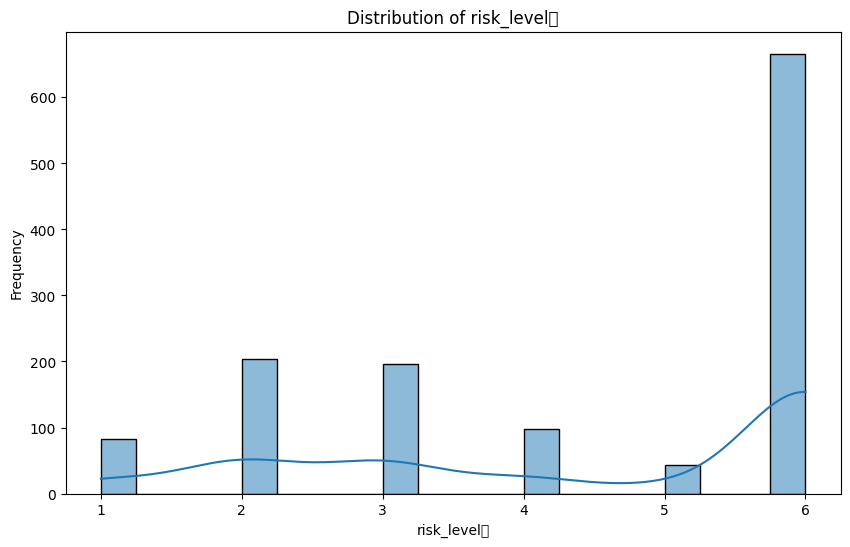

In [ ]:
# Exploratory Data Analysis (EDA)

# Plot 1: Distribution of risk_level
plt.figure(figsize=(10, 6))
sns.histplot(df['risk_level'], bins=20, kde=True)
plt.title('Distribution of risk_level	')
plt.xlabel('risk_level	')
plt.ylabel('Frequency')
plt.show()

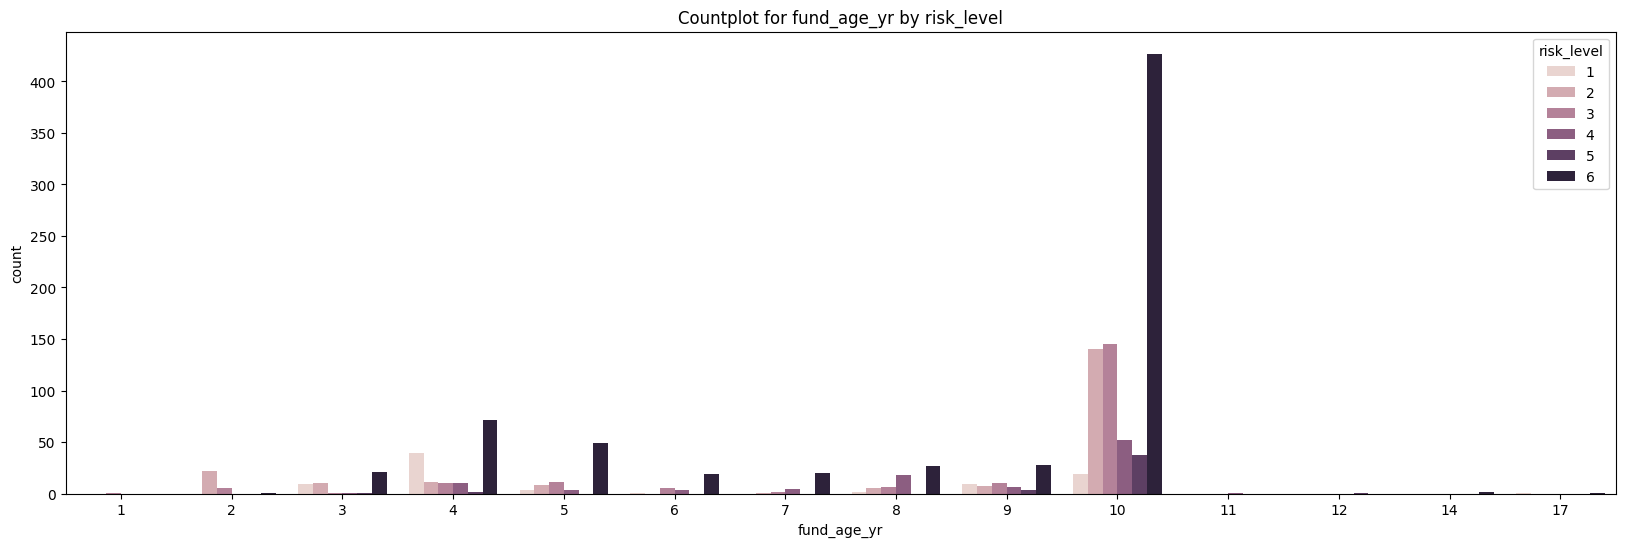

In [ ]:
# Plot 3: Countplot for risk_level
plt.figure(figsize=(20, 6))
sns.countplot(x='fund_age_yr', hue='risk_level', data=df)
plt.title('Countplot for fund_age_yr by risk_level')
plt.show()

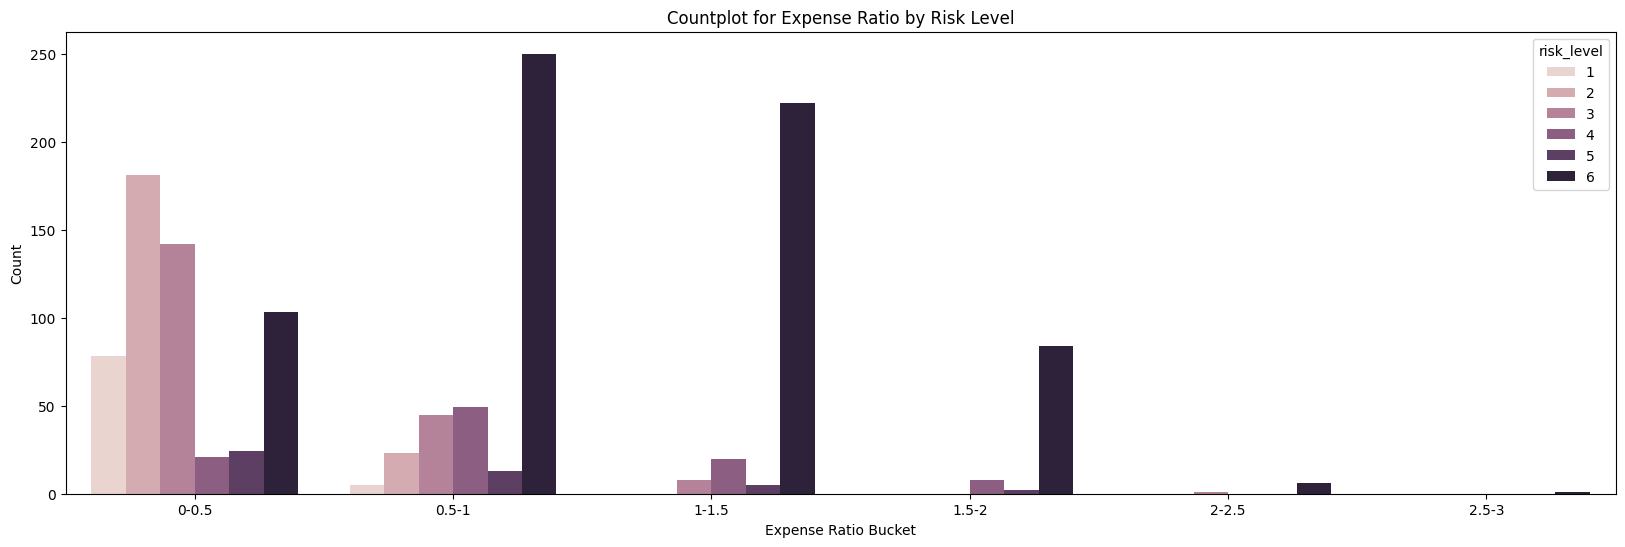

In [ ]:
# Define the bucket ranges
bins = [0, 0.5, 1, 1.5,  2, 2.5, 3]
labels = ['0-0.5', '0.5-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3']

# Create a new column 'expense_ratio_bucket' with the bucketed values
df['expense_ratio_bucket'] = pd.cut(df['expense_ratio'], bins=bins, labels=labels, include_lowest=True, right=False)

# Plot the countplot for the bucketed expense_ratio
plt.figure(figsize=(20, 6))
sns.countplot(x='expense_ratio_bucket', hue='risk_level', data=df)
plt.title('Countplot for Expense Ratio by Risk Level')
plt.xlabel('Expense Ratio Bucket')
plt.ylabel('Count')
plt.show()

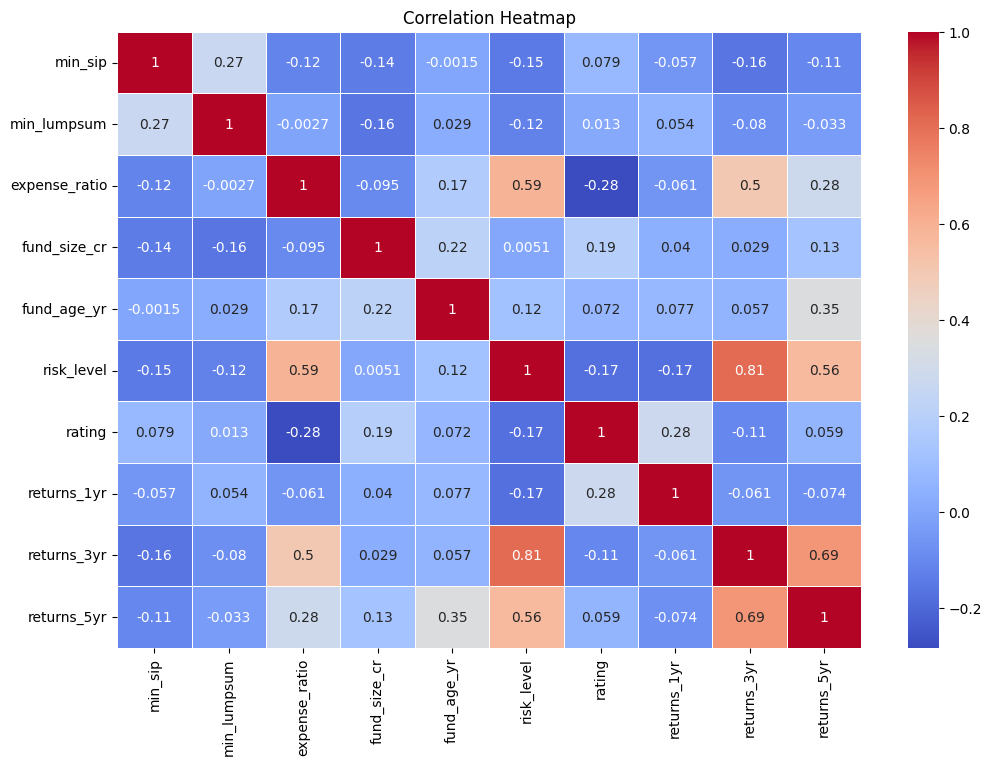

In [ ]:
# Plot 4: Correlation heatmap
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

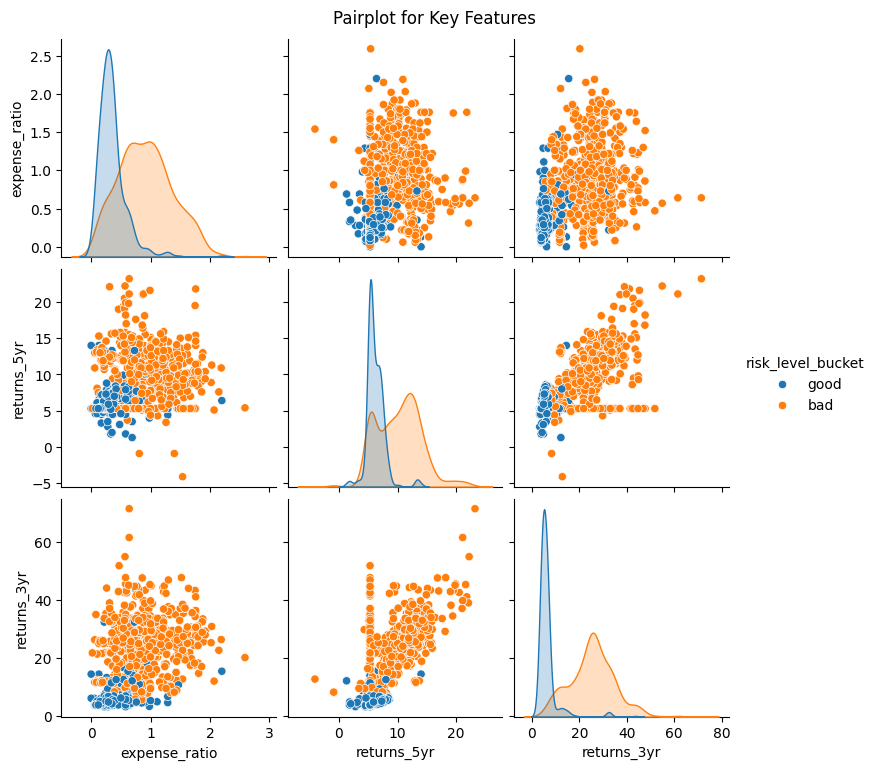

In [ ]:
# Create a new risk_level bucket
df['risk_level_bucket'] = df['risk_level'].apply(lambda x: 'good' if x in [1, 2, 3] else 'bad')

# Plotting the pairplot
sns.pairplot(df[['expense_ratio', 'returns_5yr', 'returns_3yr', 'risk_level_bucket']], hue='risk_level_bucket')
plt.suptitle('Pairplot for Key Features', y=1.02)  # Adjust the title position
plt.show()


In [ ]:
# Select only the numeric columns for normalization
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a StandardScaler
scaler = StandardScaler()

# Normalize the numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,...,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr,expense_ratio_bucket,risk_level_bucket
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,-1.180831,-1.159186,-0.914907,-0.539070,0.630976,Kaustubh Gupta,0.32,2.24,9.39,...,-0.773959,Aditya Birla Sun Life Mutual Fund,0.231683,Other,FoFs Domestic,0.006437,-0.962888,-0.484186,0-0.5,good
1,Aditya Birla SL Arbitrage Fund,1.320103,-0.805269,-0.724812,0.048447,0.630976,Lovelish Solanki,1.33,1.53,0.72,...,-1.875592,Aditya Birla Sun Life Mutual Fund,0.231683,Hybrid,Arbitrage Mutual Funds,0.269192,-1.103225,-0.862927,0-0.5,good
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1.320103,-0.805269,-0.365744,-0.518881,0.630976,Vinod Narayan Bhat,3.44,2.67,10.58,...,0.327674,Aditya Birla Sun Life Mutual Fund,0.231683,Other,FoFs Domestic,-0.322007,0.060746,0.273295,0.5-1,bad
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,-0.069305,-0.805269,0.120055,-0.452961,-1.686491,Atul Penkar,2.18,-6.37,14.99,...,0.878490,Aditya Birla Sun Life Mutual Fund,-0.457494,Solution Oriented,Childrens Funds,-0.765406,-0.087846,-0.917032,0.5-1,bad
4,Aditya Birla SL Balanced Advantage Fund,-1.180831,-1.159186,-0.196770,0.336574,0.630976,Mohit Sharma,3.69,1.99,10.38,...,0.878490,Aditya Birla Sun Life Mutual Fund,0.920859,Hybrid,Dynamic Asset Allocation or Balanced Advantage,0.088548,0.035981,0.273295,0.5-1,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,Quant Focused Fund,1.320103,0.767695,-0.281257,-0.510367,0.630976,Sanjeev Sharma,3.14,8.6,17.34,...,0.878490,Quant Mutual Fund,1.610035,Equity,Focused Funds,0.203503,1.282503,1.193093,0.5-1,bad
1287,Quant Infrastructure Fund,1.320103,0.767695,-0.133405,-0.427554,0.630976,Vasav Sahgal,3.44,27.24,19.24,...,0.878490,Quant Mutual Fund,1.610035,Equity,Sectoral / Thematic Mutual Funds,0.269192,3.577425,3.357325,0.5-1,bad
1288,Quant Large and Mid Cap Fund,1.320103,0.767695,-0.302379,-0.450901,0.630976,Sanjeev Sharma,3.12,6.57,17.72,...,0.878490,Quant Mutual Fund,1.610035,Equity,Large & Mid Cap Funds,0.482680,1.224717,1.490675,0.5-1,bad
1289,Quant Liquid Plan – Direct Growth,1.320103,0.767695,-0.872664,-0.326064,0.630976,Sanjeev Sharma,8.6,1.58,0.27,...,-1.324775,Quant Mutual Fund,1.610035,Debt,Liquid Mutual Funds,0.269192,-1.094970,-0.754715,0-0.5,good


In [ ]:
# Assuming 'risk_level_bucket' is the target variable
X = df.drop(['risk_level_bucket', 'risk_level'], axis=1)
y = df['risk_level_bucket']

In [ ]:
# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Random Forest Model

# Create Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)


In [ ]:
# Fit the classifier to the training data
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_
n_estimators = rf_model.n_estimators


In [ ]:
feature_importances, n_estimators

(array([0.00316178, 0.00453328, 0.05179834, ..., 0.00843449, 0.00019859,
        0.        ]),
 100)

In [ ]:
# Predictions on the testing set
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

In [ ]:
# Precision, Recall, Confusion Matrix
precision_rf = precision_score(y_test, y_pred_rf, pos_label='good')  # Assuming 'good' is the positive class
recall_rf = recall_score(y_test, y_pred_rf, pos_label='good')  # Assuming 'good' is the positive class
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf, labels=['bad', 'good'])

# Print the results
print(f'Precision: {precision_rf:.2f}')
print(f'Recall: {recall_rf:.2f}')
print(f'Confusion Matrix:\n{conf_matrix_rf}')

Precision: 0.97
Recall: 0.93
Confusion Matrix:
[[161   3]
 [  7  88]]


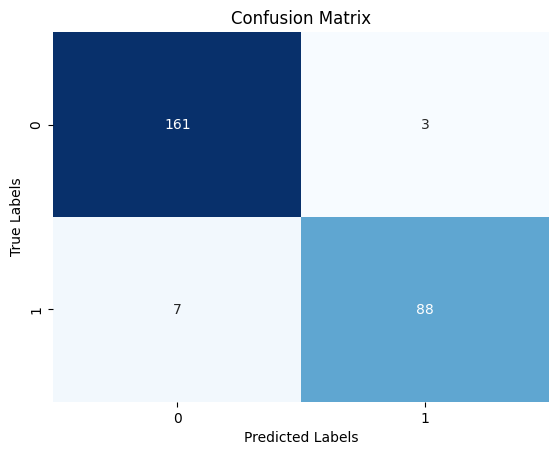

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already calculated conf_matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix in color formatting
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# F1 Score
f1_rf = f1_score(y_test, y_pred_rf, pos_label='good')  # Assuming 'good' is the positive class

# Print the result
print(f'F1 Score: {f1_rf:.2f}')


F1 Score: 0.95


In [ ]:
# AUC-ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf, pos_label='good')
roc_auc_rf = auc(fpr_rf, tpr_rf)

In [ ]:
# Print evaluation metrics
print(f'Random Forest Model Metrics:')
print(f'Precision: {precision_rf:.2f}')
print(f'Recall: {recall_rf:.2f}')
print(f'F1-score: {f1_rf:.2f}')
print(f'Confusion Matrix:\n{conf_matrix_rf}')
print(f'ROC AUC Score: {roc_auc_rf:.2f}')

Random Forest Model Metrics:
Precision: 0.97
Recall: 0.93
F1-score: 0.95
Confusion Matrix:
[[161   3]
 [  7  88]]
ROC AUC Score: 0.99


In [ ]:
# Training set performance
train_pred_rf = rf_model.predict(X_train)
train_precision_rf = precision_score(y_train, train_pred_rf, pos_label='good')
train_recall_rf = recall_score(y_train, train_pred_rf, pos_label='good')
train_f1_rf = f1_score(y_train, train_pred_rf, pos_label='good')
train_roc_auc_rf = roc_auc_score(y_train, rf_model.predict_proba(X_train)[:, 1])

In [ ]:
# Testing set performance
test_precision_rf = precision_score(y_test, y_pred_rf, pos_label='good')
test_recall_rf = recall_score(y_test, y_pred_rf, pos_label='good')
test_f1_rf = f1_score(y_test, y_pred_rf, pos_label='good')

In [ ]:
# Print evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("\nRandom Forest Model Testing Set Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(f'Precision: {test_precision_rf:.2f}')
print(f'Recall: {test_recall_rf:.2f}')
print(f'F1-score: {test_f1_rf:.2f}')
print(f'Confusion Matrix:\n{conf_matrix_rf}')
print(f'ROC AUC Score: {roc_auc_rf:.2f}')


Random Forest Model Testing Set Metrics:
Accuracy: 0.9613899613899614
Precision: 0.97
Recall: 0.93
F1-score: 0.95
Confusion Matrix:
[[161   3]
 [  7  88]]
ROC AUC Score: 0.99


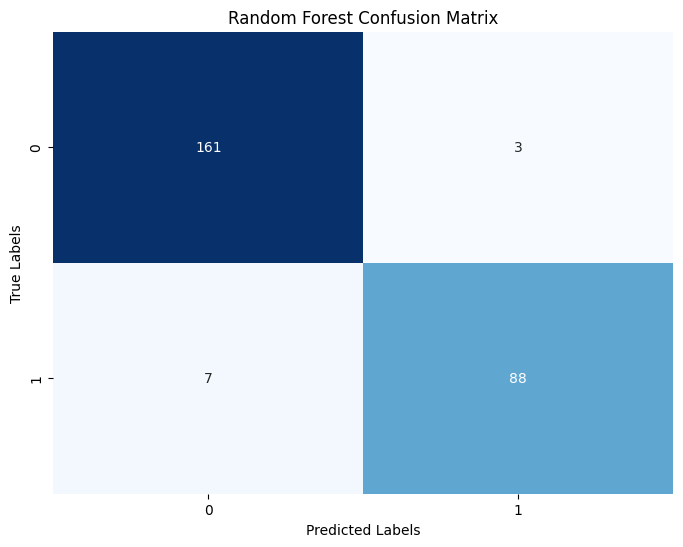

In [ ]:
# Random Forest Model Evaluation Metrics

# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

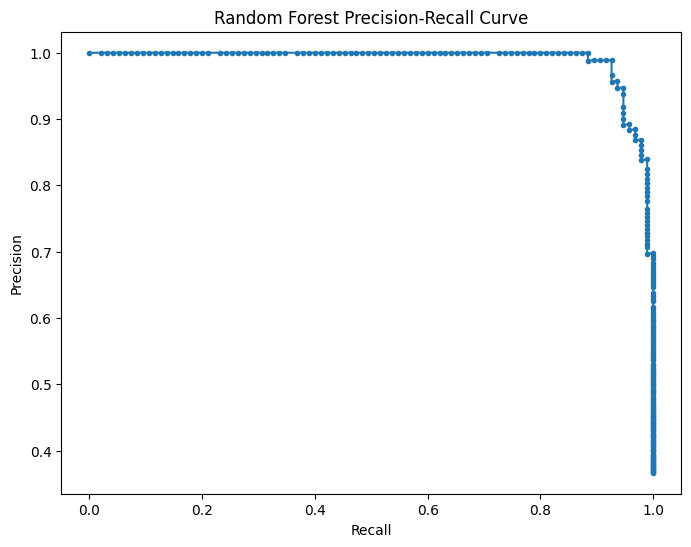

In [ ]:
# Precision-Recall Curve
precision_curve_rf, recall_curve_rf, _ = precision_recall_curve(y_test, y_prob_rf, pos_label='good')
plt.figure(figsize=(8, 6))
plt.plot(recall_curve_rf, precision_curve_rf, marker='.')
plt.title('Random Forest Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


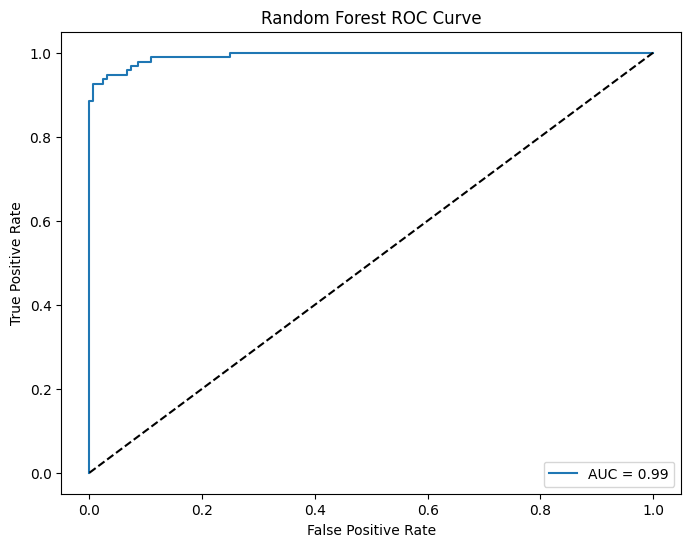

In [ ]:
# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Random Forest ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

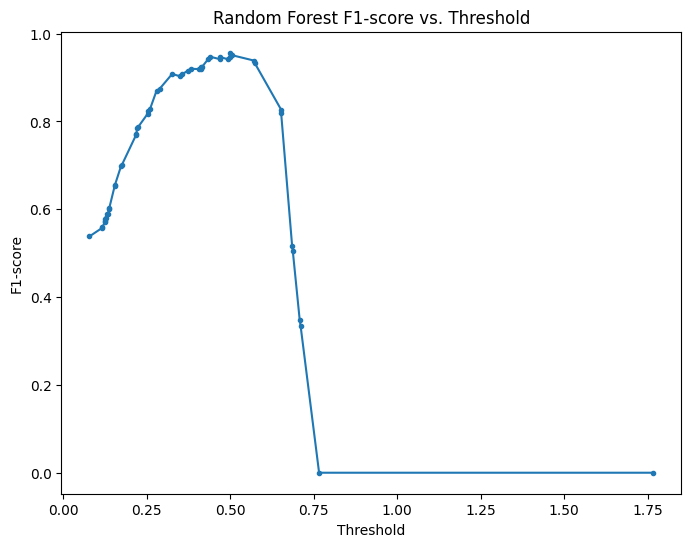

In [ ]:
y_test_numeric = np.where(y_test == 'good', 1, 0)

# Calculate F1-scores for each threshold
f1_values_rf = [f1_score(y_test_numeric, (y_prob_rf > threshold).astype(int)) for threshold in thresholds_rf]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(thresholds_rf, f1_values_rf, marker='.')
plt.title('Random Forest F1-score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.show()

In [ ]:
# Random Forest Classifier with hyperparameter tuning
# Adding hyperparameter tuning using GridSearchCV

# Random Forest Classifier with hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV # Import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 800],
    'max_depth': [None, 10, 20, 30, 40, 50, 80],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30],
    'min_samples_leaf': [1, 2, 4, 8, 16, 32]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print(best_rf)

# Printing the best parameters found by GridSearchCV
print("Best Parameters Found by GridSearchCV:\n", grid_search.best_params_)


Fitting 3 folds for each of 1764 candidates, totalling 5292 fits
RandomForestClassifier(n_estimators=200, random_state=42)
Best Parameters Found by GridSearchCV:
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Import necessary functions

# Training with the best hyperparameters
best_rf.fit(X_train, y_train)

# Evaluating the tuned model
y_pred_rfTuned = best_rf.predict(X_test)

print("Tuned Model Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_rfTuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rfTuned))
print("Classification Report:\n", classification_report(y_test, y_pred_rfTuned))

Tuned Model Performance
Accuracy: 0.73
Confusion Matrix:
 [[134   7]
 [ 47  12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.95      0.83       141
           1       0.63      0.20      0.31        59

    accuracy                           0.73       200
   macro avg       0.69      0.58      0.57       200
weighted avg       0.71      0.73      0.68       200



In [ ]:
# Training set performance
train_pred_rfTuned = best_rf.predict(X_train)
train_precision_rf = precision_score(y_train, train_pred_rfTuned)
train_recall_rf = recall_score(y_train, train_pred_rfTuned)
train_f1_rf = f1_score(y_train, train_pred_rfTuned)
train_roc_auc_rf = roc_auc_score(y_train, best_rf.predict_proba(X_train)[:, 1])

In [ ]:
# Evaluation Metrics

# Precision, Recall, Confusion Matrix
precision_rfTuned = precision_score(y_test, y_pred_rfTuned)
recall_rfTuned = recall_score(y_test, y_pred_rfTuned)
conf_matrix_rfTuned = confusion_matrix(y_test, y_pred_rfTuned)

In [ ]:
# F1-score
f1_rfTuned = f1_score(y_test, y_pred_rfTuned)

In [ ]:
# AUC-ROC
fpr_rfTuned, tpr_rfTuned, thresholds_rfTuned = roc_curve(y_test, y_prob_rfTuned)
roc_auc_rfTuned = auc(fpr_rfTuned, tpr_rfTuned)
roc_auc_rfTuned

0.6343310494049765

In [ ]:
# Print evaluation metrics
print(f'Random Forest Model Metrics:')
print(f'Precision: {precision_rfTuned:.2f}')
print(f'Recall: {recall_rfTuned:.2f}')
print(f'F1-score: {f1_rfTuned:.2f}')
print(f'Confusion Matrix:\n{conf_matrix_rfTuned}')
print(f'ROC AUC Score: {roc_auc_rfTuned:.2f}')

Random Forest Model Metrics:
Precision: 0.63
Recall: 0.20
F1-score: 0.31
Confusion Matrix:
[[134   7]
 [ 47  12]]
ROC AUC Score: 0.63


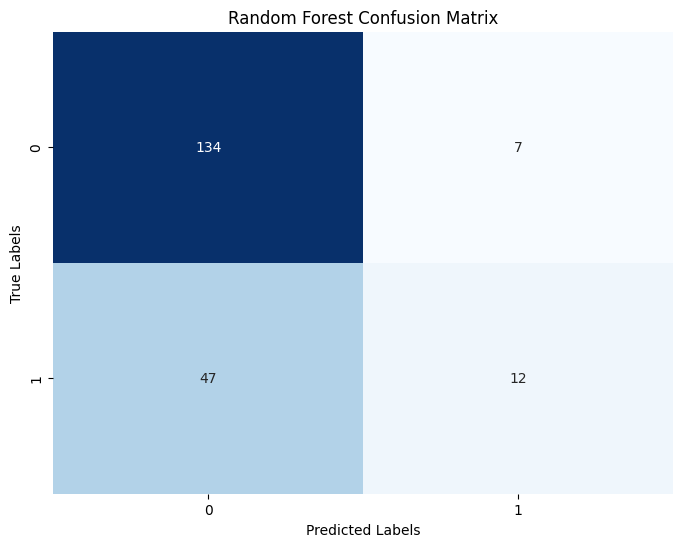

In [ ]:
# Random Forest Model Evaluation Metrics

# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rfTuned, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

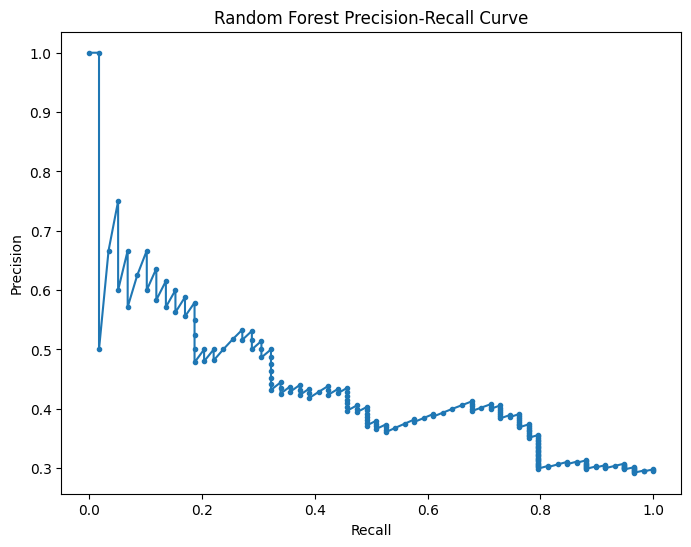

In [ ]:
# Precision-Recall Curve
precision_curve_rf, recall_curve_rf, _ = precision_recall_curve(y_test, y_prob_rfTuned)
plt.figure(figsize=(8, 6))
plt.plot(recall_curve_rf, precision_curve_rf, marker='.')
plt.title('Random Forest Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

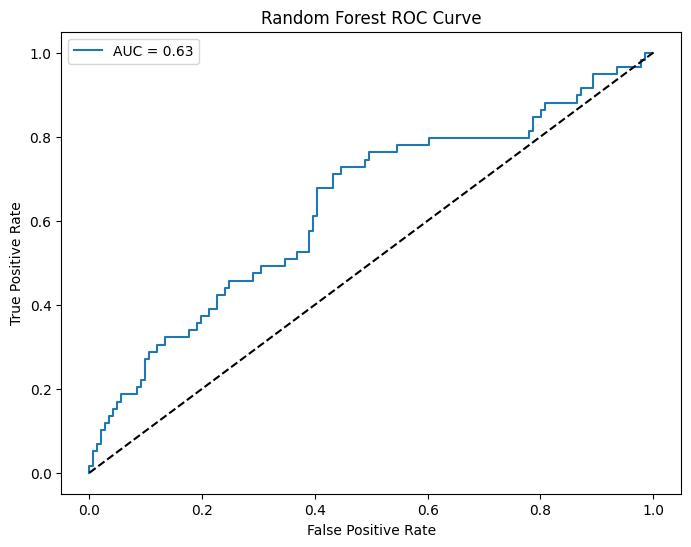

In [ ]:
# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Random Forest ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

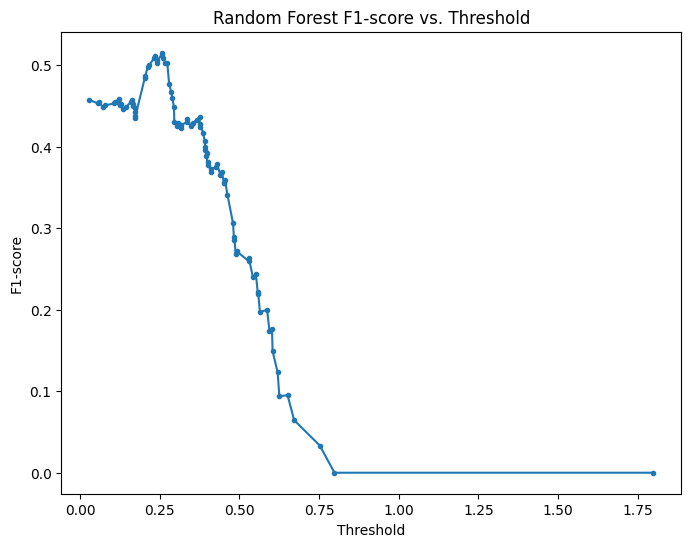

In [ ]:
# F1-score Plot
f1_values_rf = [f1_score(y_test, (y_prob_rf > threshold).astype(int)) for threshold in thresholds_rf]
plt.figure(figsize=(8, 6))
plt.plot(thresholds_rf, f1_values_rf, marker='.')
plt.title('Random Forest F1-score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.show()

Learner Activity-1:

Implement a random forest model with relevant EDA and comprehensive performance metrics plot relevant to classification using the dataset provided to you.

The dataset provided is a comprehensive Mututal Funds dataset containing information for multiple schemes. Build a decision tree model to predict the 'risk level' of a scheme and report all relevant classification performance metrics